# Rubik's Snakes

## Objet du problème

Un [*Rubik's snake*](https://fr.wikipedia.org/wiki/Rubik%27s_Snake) $s$ est donné ;
en *notation officielle*, $s=$ `1R1-2L3-2R3-3L1-3R1` par exemple, ou en *notation simplifiée*, $s=$ `113310` même exemple, sachant que le dernier chiffre, ici `0`, n'est pas significatif (sauf si le jeu est cyclique).

On se propose 

1. de calculer la notation simplifiée du jeu s'il est donné en notation officielle ;
2. de déterminer si le jeu est cyclique  et s'il est physiquement réalisable (dans l'exemple précédent : non et oui) ;
3. d'en obtenir une représentation graphique ; 
4. et de fournir une aide à sa réalisation "à la main".

## Méthode

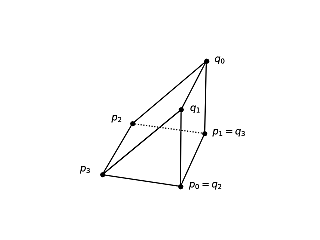

Au départ, le jeu est déployé en ligne droite. On effectue les rotations voulues de gauche à droite tout en lisant le mot $s$ (en notation simplifiée).  
Chaque prisme $P$ a trois faces carrées : une grande et deux petites. appelons *face d'entrée* la petite face carrée de gauche et *face de sortie* la petite face carrée de droite (c'est la face d'entrée du prisme suivant).  
On représente un prisme par les 4 sommets $(p_0,p_1,p_2,p_3)$ de sa face d'entrée, ordonnés de manière que $[p_0,p_1]$ soit l'arête intersection des 2 petites faces carrées et que les deux points $q_{0,1}=p_{1,0}+(p_1-p_0)\wedge(p_3-p_0)$ forment l'arête parallèle à $[p_0,p_1]$  de la face de sortie (ces arêtes sont supposées de longueur $1$).  
Ainsi $(q_0,q_1,q_2=p_0,q_3=p_1)$ représente le prisme $Q$ situé après $P$ (avant toute rotation) ; et une rotation de $Q$ par rapport à $P$ est une permutation circulaire sur les $q_i$.

#### 1. Conversion notation officielle $\rightarrow$ notation simplifiée
Facile

####  2. Cyclicité et réalisabilité
Le jeu est cyclique si, à une rotation près, la face de sortie du dernier prisme coïncide avec la face d'entrée du premier.

Noter que chaque prisme est contenu dans un cube comme sur la figure suivante

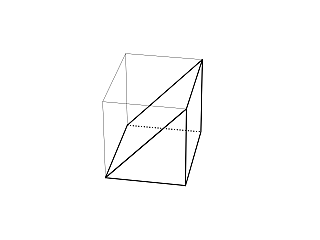

et que 2 prismes s'intersectent (le jeu n'est alors pas réalisable) s'ils partagent le même cube, à moins que les 2 prismes soient différents et qu'ils partagent la même grande face carrée (à eux deux, ils occupent tout le cube).

#### 3. Graphisme

Les points précédents n'utilisent que `Python` mais les procédures graphiques sont implémentées en `Sage`  pour profiter de ses  possibilités d'animation des images 3D, c'est pourquoi le présent Notebook nécessite un noyau `sagemath`.

Le calcul de la représentaton graphique du jeu est dés lors affaire de technique et ne présente pas de difficulté particulière.

#### 4. Aide

En principe, pour réaliser physiquement le jeu (supposé réalisable, bien entendu), on lit sa représentation simplifiée $s$ de gauche à droite en effectuant sur le jeu matériel, au fur et à mesure, les rotations correspondantes. Dans beaucoup de cas, cela suffit. Mais il peut arriver que l'on soit bloqué à une étape du processus. 

Prenons par exemple $s=$ `300220321232321230020012`. 

On commence par réaliser `3002`, c'est à dire 
- une rotation d'un quart de tour du deuxième prisme autour du premier dans le sens inverse des aiguilles d'une montre
- suivi d'une rotation d'un demi tour du cinquième prisme autour du quatrième.

L'étape suivante (le `2` en cinquième position dans $s$) consisterait à effectuer une rotation d'un demi tour du sixième prisme autour du cinquième mais cela est rendu impossible par le fait que `300220000000000000000000` n'est pas réalisable. Dans ces conditions, on laisse tomber cette étape et on continue la lecture de $s$ tout en remettant à plus tard les étapes irréalisables. On réalise ainsi   
$s_1=$ `300200321230301230020010` et il reste à réaliser  
$s_2=$ `000020000002020000000000`, ce qui se fait sans problème.  
Ainsi l'aide à la résolution du jeu consiste ici à afficher la suite de chaines $s_1,s_2$

D'une part, cette suite peut être plus longue ($s_1,s_2,\ldots$) et, d'autre part, il se peut, dans certains cas très rares, qu'elle n'aboutisse pas : on tombe sur une chaine $s_k$ dont aucune des rotations correspondantes n'est réalisable. Dans ce cas, on annonce que le procédé a failli et on affiche $s_k$. La méthode choisie n'est pas infaillible.

Enfin, on propose aussi une méthode graphique qui présente, graphiquement donc, chaque rotation à réaliser.


## Implémentation

Un Rubik's Snake est représenté par la classe `RubikSnake`:

$R=$ `RubikSnake`$(s)$ où $s$ est une représentation officielle ou simplifiée. Alors :

$R$ `.s` $=$ représentation simplifiée de $R$

$R$ `.cyclique`$=$ `True`|`False`

$R$ `.realisable()` $=$ `True`|`False`

$R$ `.plot(colors = colors7, dilatation = 1., theta = 0., **kwargs)`
- `colors` $=$ la liste des couleurs des prismes
- si `dilatation` $<1$ les prismes apparaissent plus petits
- `theta` pour avoir une autre vue
- les autre arguments sont passés à la méthode `plot` de `sage`, par exemple `alpha` $<1$ pour la transparence

$R$ `.aide()` affiche $s_1,s_2,\ldots$ 

Aide graphique :

Dans une cellule, écrire et executer :

```python
R=RubikSnake('...')
#print(R.s + '\n' + '-' * 20)
#R.aide()
G = R.aideGraphique()
```

Dans la cellule suivante, écrire :

```python
try:
    next(G)
except StopIteration:
    R.plot()
```

et l'exécuter une, deux, ... fois pour voir apparaitre la première, la deuxième, ... rotation à exécuter.

In [1]:
import numpy as np

def fleche(x, v, radius, **kwargs):

    from sage.plot.plot3d.shapes import Cone
        
    height = (sum(v**2))**.5
    k = height * np.array([0,0,1])
    return Cone(radius, height, closed = False, **kwargs).rotate(k + v, pi).translate(x)
    

colors2 = [Color('#5770B7'), Color('#43B3A3')]
colors7 = ["yellow", "orange", "red", "purple", "darkblue", "deepskyblue", "lightgreen"]

class RubikSnake:

    def __init__(self, s):
        
        def rotation(m): # renvoie la face m tournée de pi/2
            return np.array([m[3], m[0], m[1], m[2]])
        
        if '-' in s:
            # s est en notation officielle
            u = list(map(lambda t: (int(t[:-2]),t[-2],int(t[-1])), s.split('-')))
            n = max([t[0] for t in u])
            t = list('0' * 2 * n)
            for k, d, c in u:
                if d == 'R':
                    t[2 * k - 2] = str(c)
                else:
                    t[2 * k - 3] = str(4 - c)
            self.s = ''.join(t) # notation simplifiée
        else:
            # s est déjà en notation simplifiée
            self.s = s
            
        m0 = np.array([[1,0,0],[1,1,0],[0,1,0],[0,0,0]]) # 1ere face
        m = m0            # face courante
        self.prismes = [] # liste des prismes
        for i, k in enumerate(self.s):
            aux =  m[1] + np.cross(m[1] - m[0], m[3] - m[0])
            m_succ = np.array([aux, aux + m[0] - m[1], m[0], m[1]]) # face suivante
            self.prismes.append([m[0], m[1], m[2], m[3], m_succ[0], m_succ[1]])
            m = m_succ
            for _ in range(int(k)): 
                m = rotation(m)
        self.cyclique = False
        for i in range(4):
            if (m == m0).all(): 
                self.cyclique = True
                self.s = self.s[:-1] + str(mod(int(self.s[-1]) + i, 4))
            m = rotation(m)
            
    def realisable(self):
        
        # Pour chaque prisme, calcul du centre du cube le contenant
        prismes = [(p, p[2] + p[3] + p[4] + p[5]) for p in self.prismes]
        
        for i, (p, g) in enumerate(prismes):
            for p1, g1 in prismes[:i]:
                if (g == g1).all() and (p[0] + p[1] + p1[0] + p1[1] != g).any():
                    return False
        return True
        
    def plot(self, colors = colors7, dilatation = 1., theta = 0., _y = None, **kwargs):
        
        def dilate(l, d):
                g = sum(l) / len(l)
                return list(map(lambda v: g + d * (v - g), l))
        
        G = Graphics()
        for i, p in enumerate(self.prismes):
            kwargs['color'] = colors[mod(i,len(colors))]
            G += Polyhedron(vertices = dilate(p, dilatation)).plot(**kwargs)
            if _y is not None and _y[i] != '0':
                c =  colors[mod(i + 1,len(colors))]
                g = .5 * (p[0] + p[4])
                u, v = 1.5 * (p[0] - g), 1.5 * (p[1] - g)
                t = var('t')
                G += parametric_plot3d(list(g + cos(t) * u + sin(t) * v), (t, 0, 2*pi),
                        linewidth = 5, color = c)
                a = .4 if _y[i] == '3' else -.4
                b = .085
                for x,w in [(g + u, a * v - b * u),
                            (g + v, -a * u - b * v),
                            (g - u, -a * v + b *u),
                            (g - v, a * u + b * v)]:
                    G += fleche(x, w, .1, color = c) + text3d(
                        '2' if _y[i] == '2' else '1', x - .5 * w, color = c, fontsize = 30)    
        G.rotate([1,0,0], theta).show(frame = False, isLight = False)         

    def _realisation(self, graphique = False):
        n = len(self.s)
        x = '0' * n
        while x[:-1] != self.s[:-1]:
            chgt = False
            y = ''
            z = ''
            for i, k in enumerate(self.s[:-1]):
                if x[i] == k:
                    y += '0'
                    z += '0'
                else:
                    aux = x[:i] + k + x[i+ 1:]
                    r = RubikSnake(aux)
                    if r.realisable():
                        if graphique:
                            yield RubikSnake(x).plot(_y = '0' * i + k + '0' * (n - i - 1))
                        x = aux
                        chgt = True
                        y += k
                        z += '0'
                    else:
                        y += '0'
                        z += k
            if chgt and not graphique:
                print(y + '0')
            if x[:-1] != self.s[:-1] and not chgt:
                print('SITUATION NON IMPLEMENTEE')
                if graphique:
                    yield RubikSnake(x).plot(_y = z + '0')
                else:
                    print(z + '0')
                break

    def aide(self):
        try:
            next(self._realisation())
        except StopIteration:
            pass
    
    def aideGraphique(self):
        return self._realisation(graphique = True)

## Test

In [22]:
def all(self, **kwargs):
    print(self.s, 'est' if self.cyclique else "n'est pas",'cyclique')
    print(self.s, 'est' if self.realisable() else "n'est pas",'realisable')
    print('Aide :')
    self.aide()
    self.plot(**kwargs)

RubikSnake.all = all
    
R = RubikSnake('1R3-2R3-3R1-3L2-4R3-4L2-5R3-5L2-6R1-6L2-7R1-7L2-8R3-8L2-10R1-11R1-11L2-12R3-12L2-9R1-9L2')
R.all()

G = R.aideGraphique()


303212323212123210121232 est cyclique
303212323212123210121232 est realisable
Aide :
303212303012123200021230
000000020200000000100000
000000000000000010000000


Graphics3d Object

In [45]:
# Cellule à exécuter plusieurs fois après avoir exécuté la cellule précédente

try:
    next(G)
except StopIteration:
    R.plot()

Graphics3d Object

La cellule suivante vous permet de tester vos propres exemples